## Testing Your Ray Tracer
See the [assignment docs](https://www.cs.cornell.edu/courses/cs4620/2024fa/assignments/docs/category/assignment-4) for details on our recommended path to completing the assignment.

This notebook may prove useful for testing out your ray tracer.

In [1]:
from ExampleSceneDef import *

### Step 0
When you have completed Step 0 your the image below should look like:
![Step0](./ref/step0.png)

Max diff with reference is 255.0
number of pixels with diff > 0.01 is 2571


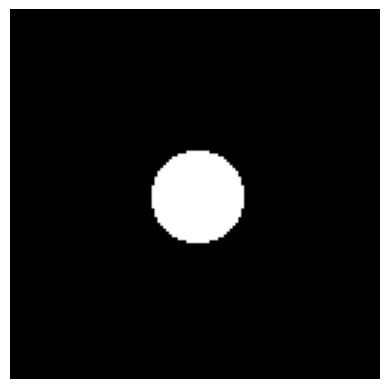

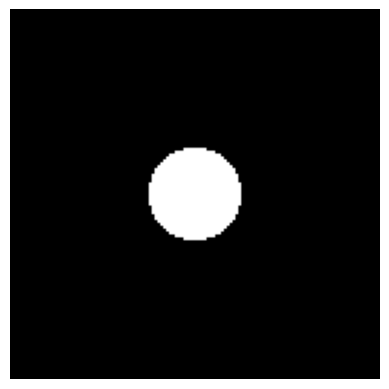

In [2]:
im = OrthoFriendlyExample().render()
im.show()
# im.writeToFile("OrthoFriendlyExample.png")
ref = Image(path="./ref/step0.png").GetFloatCopy();
ref.show()
print("Max diff with reference is {}".format(np.abs(ref.pixels-im.pixels).max()))
print("number of pixels with diff > 0.01 is {}".format(np.sum(np.abs(ref.pixels-im.pixels)>0.01)))

### Step 1
When you have completed Step 0 your the image below should look like:
![Step1](./ref/step1.png)

Max diff with reference is 1
number of pixels with diff > 0.01 is 14883


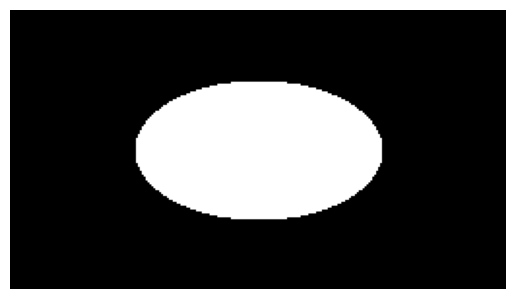

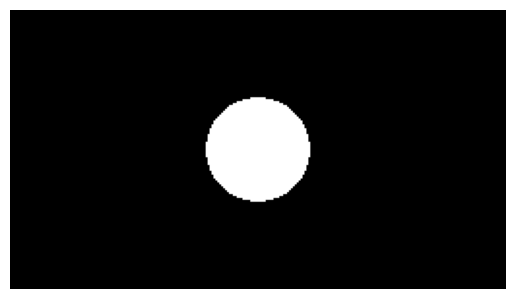

In [3]:
im = TwoSpheresExample().render(output_shape = [144,256])
im.show()

ref = Image(path="./ref/step1.png").GetUIntCopy();
ref.show()
print("Max diff with reference is {}".format(np.abs(ref.pixels-im.pixels).max()))
print("number of pixels with diff > 0.01 is {}".format(np.sum(np.abs(ref.pixels-im.pixels)>0.01)))

### Step 2-7
See the [assignment docs](https://www.cs.cornell.edu/courses/cs4620/2023fa/assignments/docs/category/assignment-4)

The code in the three cells below can be used to test out each of three different test scenes 

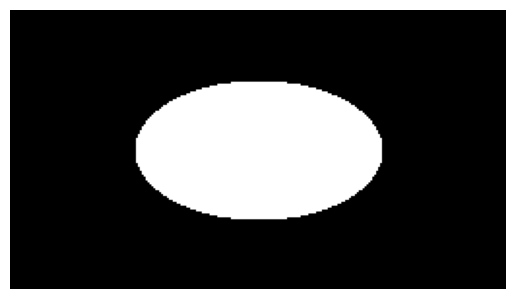

In [4]:
im = TwoSpheresExample().render(output_shape = [144,256])
im.show()

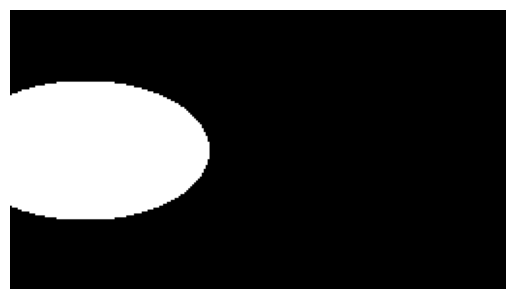

In [5]:
im = ThreeSpheresExample().render(output_shape = [144,256])
im.show()

In [6]:
im = CubeExample().render([144,256])
im.show()

ValueError: unknown file extension: 